<a href="https://colab.research.google.com/github/Adevrari/PCA-LDA/blob/main/PCA%26LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

# **PCA - Generic**

**Step 1 - Data Preparation:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.array([[50, 170], [65, 180], [70, 175], [80, 185], [55, 165]])
df = pd.DataFrame(data, columns = ['X', 'Y'])
df.head()

,X,Y
0,50,170
1,65,180
2,70,175
3,80,185
4,55,165


<hr>

**Step 2 - Standardizing the data**

In [ ]:
# calculate the mean
mean = np.mean(data, axis = 0)
# calculate the standard deviation
std = np.std(data, axis = 0)

# Standardize the data
standardized_data = (data - mean) / std

In [ ]:
df = pd.DataFrame(standardized_data, columns = ["X", 'Y'])
df

,X,Y
0,-1.311220,-0.707107
1,0.093659,0.707107
2,0.561951,0.000000
3,1.498537,1.414214
4,-0.842927,-1.414214


In [ ]:
standardized_data.T

array([[-1.31122014,  0.09365858,  0.56195149,  1.4985373 , -0.84292723],
       [-0.70710678,  0.70710678,  0.        ,  1.41421356, -1.41421356]])

<hr>

**Step 3 - Transposing the standardized data, and then finding the covariance**

In [ ]:
covariance_matrix = np.cov(standardized_data.T)

In [ ]:
covariance_matrix

array([[1.25      , 1.07618254],
       [1.07618254, 1.25      ]])

<hr>

**Step 4 - EigenDecomposition**

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [ ]:
print(f'The first eigenvalues for the data is {eigenvalues[0]} and Eigenvector for the same is : {eigenvectors[0]}')

The first eigenvalues for the data is 2.326182540115348 and Eigenvector for the same is : [ 0.70710678 -0.70710678]


In [ ]:
print(f'The seocond eigenvalues for the data is {eigenvalues[1]} and Eigenvector for the same is : {eigenvectors[1]}')

The seocond eigenvalues for the data is 0.17381745988465158 and Eigenvector for the same is : [0.70710678 0.70710678]


In [ ]:
pd.DataFrame(eigenvalues, columns = ['Eigenvalues'])

,Eigenvalues
0,2.326183
1,0.173817


In [ ]:
pd.DataFrame(eigenvectors, columns = ['X', 'Y'])

,X,Y
0,0.707107,-0.707107
1,0.707107,0.707107


<hr>

**Step 5 - How much variance / explained**

In [ ]:
# Total information provided by the values
total_info = sum(eigenvalues)

# Individual information of each eigenvalues
var_exp = [(x / total_info) for x in sorted(eigenvalues, reverse = True)]

In [ ]:
var_exp

[0.9304730160461393, 0.06952698395386063]

**Cummulative Explained Variance**

In [ ]:
cumVarinance = np.cumsum(var_exp)
pd.DataFrame(cumVarinance, columns = ['Cummulative Sum'])

,Cummulative Sum
0,0.930473
1,1.000000


**Note for important questions**
  * What is the main goal of PCA and LDA?
  * How these two are different from each other?
  

**Repeatition**

Loading the dataset

In [ ]:
from sklearn.datasets import load_digits

Loading the dataset into the file

In [ ]:
dataset = load_digits()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Loading the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['Target'] = dataset.target

In [ ]:
df.shape

(1797, 65)

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
dataset.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

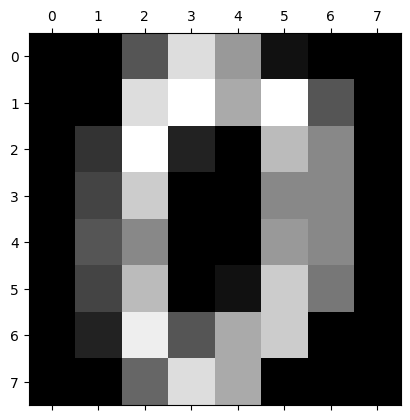

In [ ]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8, 8))
plt.show()

**Goal: To reduce the size of the data while preserving the information**

In [ ]:
X = dataset.data
Y = dataset.target

In [ ]:
X.shape

(1797, 64)

In [ ]:
Y.shape

(1797,)

<hr>

**Step 1 -  Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(scaled_df)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


<hr>

**Step 2 - Tranpose & find covarinace**

In [ ]:
cov_mat = np.cov(scaled_df.T)
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,...,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.394499,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.707913,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.602602,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774


<hr>

**Step 4 - EigenDecomposition**

In [ ]:
eigVal, eigVec = np.linalg.eig(cov_mat)

In [ ]:
pd.DataFrame(eigVal)

,0
0,7.344776
1,5.835491
2,5.153961
3,3.966236
4,2.966345
...,...
59,0.200091
60,0.189835
61,0.000000
62,0.000000


In [ ]:
pd.DataFrame(eigVec)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182234,-0.047027,0.023588,-0.178153,-0.029978,0.231723,-0.108310,0.125524,0.213820,0.059834,...,0.039356,-0.036629,0.082404,0.052290,0.197267,0.024853,0.052605,0.0,0.0,0.0
2,0.285868,-0.059565,-0.056799,-0.156129,-0.014666,0.119875,-0.004755,0.006178,0.120140,0.007681,...,-0.080164,0.176636,0.091203,-0.001822,-0.129372,-0.069592,-0.090823,0.0,0.0,0.0
3,0.220370,0.020804,-0.040464,-0.167800,0.043716,-0.100392,0.233717,-0.033408,-0.101895,-0.021639,...,0.125306,-0.224852,-0.089657,0.040788,-0.148353,0.052446,-0.323498,0.0,0.0,0.0
4,-0.025170,-0.155903,-0.067065,0.000009,-0.139993,-0.093471,-0.039540,0.046161,-0.093102,0.005066,...,0.049967,-0.024456,0.039529,0.012110,-0.072823,-0.057241,0.048470,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.194449,0.009905,-0.083464,-0.171490,0.100375,-0.086503,0.135319,-0.098852,-0.115978,-0.105825,...,-0.067003,0.101720,-0.245611,-0.069682,0.336075,0.080163,0.138750,0.0,0.0,0.0
60,0.017774,0.251934,-0.062455,0.154438,-0.003774,0.111832,-0.172848,-0.055067,-0.154210,-0.100353,...,-0.116854,0.219353,0.196726,0.048100,-0.189613,-0.081401,-0.036926,0.0,0.0,0.0
61,0.103198,0.242618,-0.022280,0.252432,0.094738,0.057756,-0.032155,0.034265,-0.027141,-0.036675,...,0.193102,-0.023445,0.152260,-0.131265,-0.019375,-0.033929,-0.168659,0.0,0.0,0.0
62,0.119811,0.165089,0.100366,0.160720,0.244026,0.028957,0.077612,-0.164484,0.144245,0.057176,...,0.067240,0.095552,-0.207269,0.284186,0.086148,-0.141619,0.094642,0.0,0.0,0.0


<hr>

**Step 5 - Finding the individual**

In [ ]:
# Total Information explained by Eigen values
tot = sum(eigVal)
# Individual Information / Variance Explained by EigenValues
var_exp = [(i/tot)*100 for i in sorted(eigVal, reverse=True)]
# Result
pd.DataFrame(var_exp)

,0
0,12.033916
1,9.561054
2,8.444415
3,6.498408
4,4.860155
...,...
59,0.103696
60,0.082535
61,0.000000
62,0.000000


**Cummulative Explained Variance**

In [ ]:
cumVariance = np.cumsum(var_exp)
pd.DataFrame(cumVariance, columns = ['Cummulative Sum'])

,Cummulative Sum
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
...,...
59,99.917465
60,100.000000
61,100.000000
62,100.000000


**Skere-plot / Step plot**

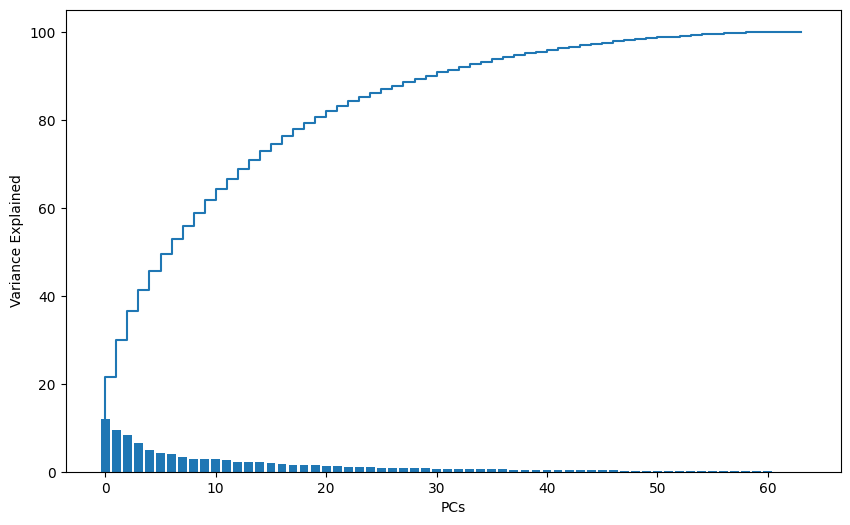

In [ ]:
plt.figure(figsize = (10, 6))
plt.bar(range(len(var_exp)), var_exp, label = 'Indivial Component Variance')
plt.step(range(len(cumVariance)), cumVariance, label = 'Cummulative Variance')
plt.xlabel('PCs')
plt.ylabel('Variance Explained')
plt.show()

**Take PCs according to the need to information**

***Implementation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, Y, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Now apply PCA

from sklearn.decomposition import PCA

pca = PCA(0.95)   #use n components as 95%

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(1797, 29)

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca.n_components_

29

In [ ]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-3.462119,2.680850,1.009450,2.009703,1.295315,1.178879,2.300582,3.670721,-0.943669,-1.132502
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,-5.255708,-1.205777,-4.838902,0.860251,-2.974439,5.288817,0.119213,2.182618,-0.510227,2.313549
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,8.731076,4.951115,-2.465109,5.999388,0.105727,-3.062671,0.166046,4.228821,2.157657,0.837958
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,-3.876889,0.269413,3.623236,2.538124,-1.354896,-1.740973,-1.340244,-5.846014,4.682220,-1.113042
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,5.035236,0.206830,5.740696,-7.611946,3.991408,2.781007,-0.166739,0.484305,0.627979,-3.287348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-14.606628,13.344124,-13.439048,-6.502950,3.787472,-2.729848,-4.432327,-3.914347,7.320933,-8.449179,...,1.613182,1.732102,2.198947,0.273557,2.325997,0.547892,-2.445219,4.914990,-0.183197,-2.788351
1793,6.464574,20.567299,-9.155110,12.554091,-9.015978,-13.707147,3.831286,-3.756258,-7.192802,-5.239837,...,-0.317365,-3.994398,-1.577277,-0.578987,1.222268,2.432416,-1.134583,-0.048710,-0.304789,-3.483718
1794,10.801284,-6.960252,5.599555,-7.227733,-3.459646,-12.375204,-4.489790,-7.415072,-3.961585,-13.065095,...,2.400419,-0.732898,4.330780,0.180299,3.817864,-5.421945,4.431521,-3.568662,1.824444,3.538859
1795,-4.872100,12.423954,-10.170866,-6.668850,3.569061,-0.003897,-2.994734,-4.357892,3.939242,-13.145255,...,-0.076164,1.871624,-1.486850,3.125878,-3.757649,5.096836,-2.690764,3.253301,0.954842,-0.938956


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x = dataset.data[:,0], y=dataset.data[:,1],z=dataset.data[:,2],
                 labels={
                     "x": "Feature 1",
                     "y": "Feature 2",
                     "z": "Feature 3"
                 },
                 opacity=1,color = dataset.target[:])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="Scatter plot without applying PCA")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

<hr>

# **Application to LDA**

In [ ]:
X = dataset.data
y = dataset.target


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
lda.explained_variance_ratio_

array([0.29234118, 0.18522993, 0.16711371, 0.11331143, 0.08163263,
       0.06569859, 0.04403582, 0.02947456, 0.02116215])

In [ ]:
X_train.shape

(1437, 9)

**LDA Scatter Plot**

In [ ]:
# Create a scatter plot
import plotly.express as px
fig = px.scatter(df, x=X_train[:,8], y=y_train,
                 labels={
                     "x": "LD1",
                     "y": "LD2",
                 },
                 opacity=1, color = y_train)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="LDA scatter plot")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

**LDA 3D Plot**

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x=X_train[:,0], y=y_train, z=X_train[:,1],
                    labels={
                        "x": "LD1",
                        "y": "LD2",
                        "z": "LD3"
                    },
                    opacity=1, color = y_train)

# Change chart background color
fig.update_layout(scene=dict(xaxis_backgroundcolor="white",
                             yaxis_backgroundcolor="white",
                             zaxis_backgroundcolor="white"))

# Update axes lines
fig.update_layout(scene=dict(xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='lightgrey',
                             xaxis_zeroline=True, xaxis_zerolinewidth=1, xaxis_zerolinecolor='lightgrey',
                             xaxis_showline=True, xaxis_linewidth=1, xaxis_linecolor='black',
                             yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='lightgrey',
                             yaxis_zeroline=True, yaxis_zerolinewidth=1, yaxis_zerolinecolor='lightgrey',
                             yaxis_showline=True, yaxis_linewidth=1, yaxis_linecolor='black',
                             zaxis_showgrid=True, zaxis_gridwidth=1, zaxis_gridcolor='lightgrey',
                             zaxis_zeroline=True, zaxis_zerolinewidth=1, zaxis_zerolinecolor='lightgrey',
                             zaxis_showline=True, zaxis_linewidth=1, zaxis_linecolor='black'))

# Set figure title
fig.update_layout(title_text="3D LDA scatter plot")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()


# **TASK: Please implement RandomForestClassifier on both the tecchniques and check the accuracy for both before implementation and after implementation**